In [12]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
df = pd.read_csv("merged_2021.csv")
df = df["High"]
df = df/df.max()
df

0         0.111613
1         0.112172
2         0.112131
3         0.112075
4         0.112142
            ...   
392123    0.484013
392124    0.483606
392125    0.483911
392126    0.484216
392127    0.484928
Name: High, Length: 392128, dtype: float64

In [14]:
import tensorflow

In [15]:
length = 200

In [16]:
df4 = df[:-length]
df4 = np.array([np.array(df4)]).T


In [17]:
for i in range(length-1):
    df2 = df[i+1:i+1-length]
    df2 = np.array([np.array(df2)]).T
    df4 = np.concatenate((df4,df2),axis=1)
x = pd.DataFrame(df4)
x

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.111613,0.112172,0.112131,0.112075,0.112142,0.112025,0.111811,0.111730,0.111501,0.111328,...,0.113789,0.113860,0.113835,0.113794,0.113758,0.113921,0.113870,0.113926,0.113916,0.113936
1,0.112172,0.112131,0.112075,0.112142,0.112025,0.111811,0.111730,0.111501,0.111328,0.111211,...,0.113860,0.113835,0.113794,0.113758,0.113921,0.113870,0.113926,0.113916,0.113936,0.114262
2,0.112131,0.112075,0.112142,0.112025,0.111811,0.111730,0.111501,0.111328,0.111211,0.110957,...,0.113835,0.113794,0.113758,0.113921,0.113870,0.113926,0.113916,0.113936,0.114262,0.114440
3,0.112075,0.112142,0.112025,0.111811,0.111730,0.111501,0.111328,0.111211,0.110957,0.110921,...,0.113794,0.113758,0.113921,0.113870,0.113926,0.113916,0.113936,0.114262,0.114440,0.114694
4,0.112142,0.112025,0.111811,0.111730,0.111501,0.111328,0.111211,0.110957,0.110921,0.110835,...,0.113758,0.113921,0.113870,0.113926,0.113916,0.113936,0.114262,0.114440,0.114694,0.114353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391923,0.479539,0.479285,0.479234,0.478776,0.478878,0.478878,0.478776,0.478522,0.477912,0.477759,...,0.484470,0.484521,0.484064,0.484115,0.484623,0.484623,0.484267,0.484623,0.484572,0.484165
391924,0.479285,0.479234,0.478776,0.478878,0.478878,0.478776,0.478522,0.477912,0.477759,0.478115,...,0.484521,0.484064,0.484115,0.484623,0.484623,0.484267,0.484623,0.484572,0.484165,0.484013
391925,0.479234,0.478776,0.478878,0.478878,0.478776,0.478522,0.477912,0.477759,0.478115,0.477861,...,0.484064,0.484115,0.484623,0.484623,0.484267,0.484623,0.484572,0.484165,0.484013,0.483606
391926,0.478776,0.478878,0.478878,0.478776,0.478522,0.477912,0.477759,0.478115,0.477861,0.478369,...,0.484115,0.484623,0.484623,0.484267,0.484623,0.484572,0.484165,0.484013,0.483606,0.483911


In [18]:
y = df[length:].values
X = x.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01,shuffle = False)
print(X_train.shape)
print(X_test.shape)

(388008, 200)
(3920, 200)


In [20]:
model = Sequential()
model.add(Dense(100, activation='linear', input_dim = X.shape[1]))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(Dense(1, activation='linear'))
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
 44192/388008 [==>...........................] - ETA: 2:21 - loss: 0.0146 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [10]:
pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 2.577266513981158e-06% 
 Error on training data: 0.999997422733486
Accuracy on test data: 0.0% 
 Error on test data: 1.0


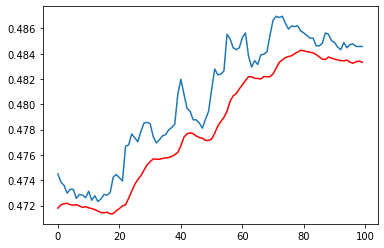

In [24]:
import matplotlib.pyplot as plt
plt.plot(pred_test[2500:2600],color="r")
plt.plot(y_test[2500:2600])
#plt.plot(pred_test+0.0 085,color='r')
#plt.plot(y_test)
plt.show()

In [12]:
df1 = pd.read_csv("merged_2021.csv")
df1 = df1["High"]
df2 = pd.read_csv("XRPUSDT-1m-2021-10-01.csv")
df2 = df2["High"]
df2 = df2/df1.max()
df2

0       0.484979
1       0.485284
2       0.485589
3       0.486453
4       0.486504
          ...   
1435    0.530228
1436    0.530228
1437    0.530228
1438    0.530279
1439    0.530177
Name: High, Length: 1440, dtype: float64

In [13]:
X_train.shape

(388008, 200)

In [14]:
dfa = np.array(df2)
dfa

array([0.48497882, 0.48528387, 0.48558892, ..., 0.53022792, 0.53027876,
       0.53017708])

In [15]:
for i in range(df2.shape[0]-length):
    dfa[i+length] = model.predict(np.array([dfa[i:length+i]]))[0]

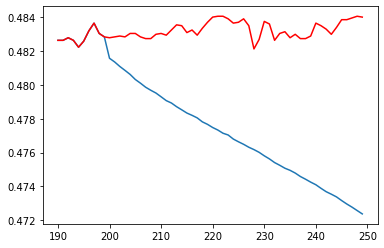

In [21]:
dfk = pd.DataFrame(dfa)
plt.plot(dfk[190:250])
plt.plot(df2[190:250],color = "r")
plt.show()